# Titanic is Sinking, Let's see who will Survive

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Let Do EDA (Exploratory Data Analysis)

In [1]:
# import all the needed package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('../input/train.csv', index_col=0)
test = pd.read_csv('../input/test.csv', index_col=0)

In [3]:
# train dataframe head
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# test dataframe head
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# let check info for dataframe
def check_info(train, test):
  print(train.info())
  print('_'*40)
  print(test.info())
  print('_'*40)

In [6]:
check_info(train,test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: fl

In [7]:
# Check Data Description to have idea of the data
def describe_info(train, test):
  print(train.describe())
  print('_'*40)
  print(test.describe())
  print('_'*40)

In [8]:
describe_info(train, test)

         Survived      Pclass     ...           Parch        Fare
count  891.000000  891.000000     ...      891.000000  891.000000
mean     0.383838    2.308642     ...        0.381594   32.204208
std      0.486592    0.836071     ...        0.806057   49.693429
min      0.000000    1.000000     ...        0.000000    0.000000
25%      0.000000    2.000000     ...        0.000000    7.910400
50%      0.000000    3.000000     ...        0.000000   14.454200
75%      1.000000    3.000000     ...        0.000000   31.000000
max      1.000000    3.000000     ...        6.000000  512.329200

[8 rows x 6 columns]
________________________________________
           Pclass         Age       SibSp       Parch        Fare
count  418.000000  332.000000  418.000000  418.000000  417.000000
mean     2.265550   30.272590    0.447368    0.392344   35.627188
std      0.841838   14.181209    0.896760    0.981429   55.907576
min      1.000000    0.170000    0.000000    0.000000    0.000000
25%      1.00

### What we have done till now



1.   Imported the Train and Test file in Respectative DataFrame
2.   Make the data index by Passerenger ID in both train and test
3.   Check the Data Infomation using info tag which tell us the that there are float, integer and text data in the set.
4.  There are missing data in the column which we need to fix in **Missing Data ** Section down below.
5.  We will have to explore the data more basis on Survived tab so we do not have dataset imbalanced issue. 


## Missing Data Opertation



1.   As Age is missing we would use mean to fill the missing value in train and test dataset
2.   Cabin data missing darstically, it would be good that we drop the column in both train and test.
3.   One Record for fare is missing in test dataset so will fill the mode.



In [9]:
TrainAgeMean = round(train['Age'].mean())
TestAgeMean = round(test['Age'].mean())
print('Train Age Mean :-', TrainAgeMean)
print('Test Age Mean :-', TestAgeMean)

Train Age Mean :- 30
Test Age Mean :- 30


In [10]:
train['Age'] = train['Age'].fillna(value=TrainAgeMean)
test['Age'] = test['Age'].fillna(value=TestAgeMean)


In [11]:
TestFareMode = test['Fare'].mode()[0]
print(TestFareMode)

7.75


In [12]:
test['Fare'] = test['Fare'].fillna(value=TestFareMode)

In [13]:
train.drop(columns=['Cabin'], axis=1, inplace=True)
test.drop(columns=['Cabin'], axis=1, inplace=True)

In [14]:
check_info(train, test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB
None
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 32.7+ KB
None
______

#### What we have done so far?


1.   Filled the missing value for Age in Train and Test Dataset using Mean Vale
2.   Remove Cabin from both the dataset as most of the data is missing
3.   A single record for fare was missing which was filled using Mode Value



## Let's Create some Graph

In [15]:
import seaborn as sns
sns.set(style="whitegrid")

In [16]:
corr = train.corr()

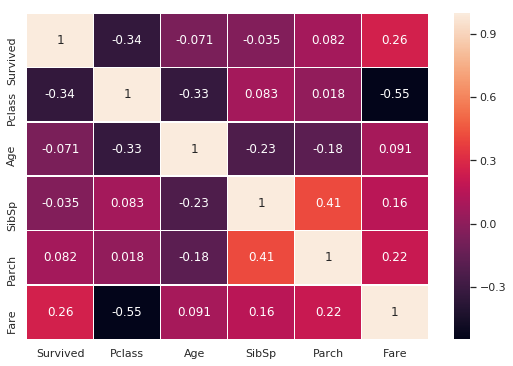

In [17]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [18]:
train['Family'] = train['Parch'] + train['SibSp']
test['Family'] = test['Parch'] + test['SibSp']

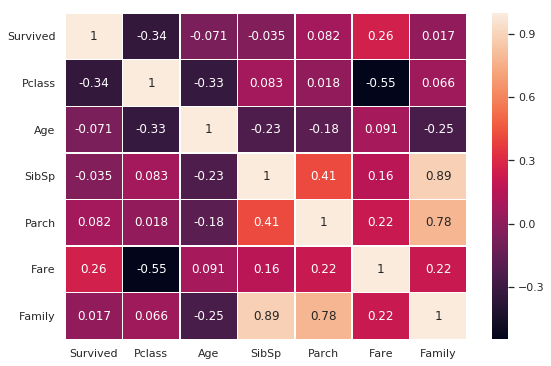

In [19]:
corr = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

Text(0,0.5,'Number of People Survied or Not Survived')

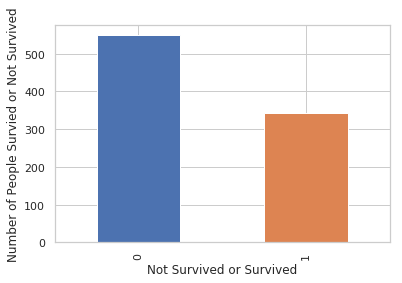

In [20]:
# Value Count Chart
ax = train['Survived'].value_counts().plot.bar()
ax.set_xlabel("Not Survived or Survived")
ax.set_ylabel("Number of People Survied or Not Survived")

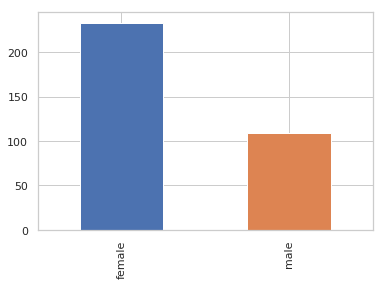

In [21]:
# Number of People who survived the even according to Sex
train[train['Survived'] == 1].Sex.value_counts().plot.bar()

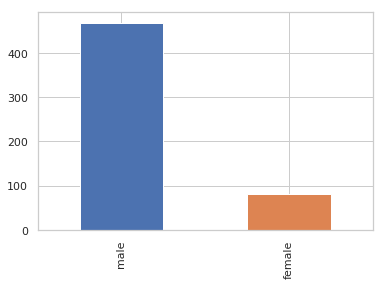

In [22]:
# Number of People who not survived the even according to Sex
train[train['Survived'] == 0].Sex.value_counts().plot.bar()

### What can we conclude from the above data?

From the above data we can conclude that the most people who died on the ship were male. Most of Female were saved might be due to the fact shown in movie about saving women and children on boat first. To Confirm the story our next action would be to see how many children who are below the age of 18 are survived the sinking.

In [23]:
train[(train['Age'] <= 18)].Sex.value_counts()

male      71
female    68
Name: Sex, dtype: int64

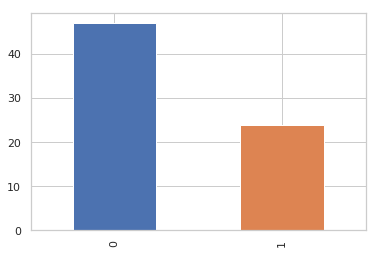

In [24]:
train[(train['Age'] <= 18) & (train['Sex'] == 'male')].Survived.value_counts().plot.bar()

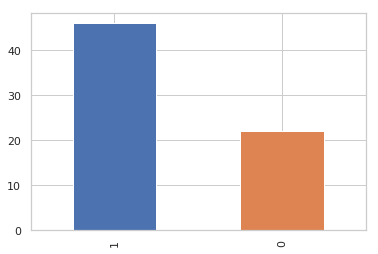

In [25]:
train[(train['Age'] <= 18) & (train['Sex'] == 'female')].Survived.value_counts().plot.bar()

By looking at the data above there are 139 Children on Titanic, out of which 71 were male and 68 were female. Most of Femal Child survived the sinking of the ship where male Child did not.

Now that we know that maximum Female were alived, let check from where did they embarked.

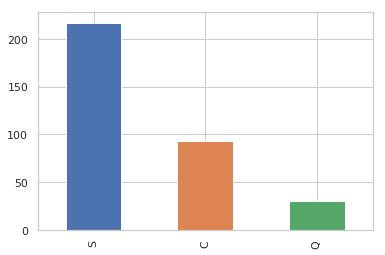

In [26]:
train[train['Survived'] == 1]['Embarked'].value_counts().plot.bar()

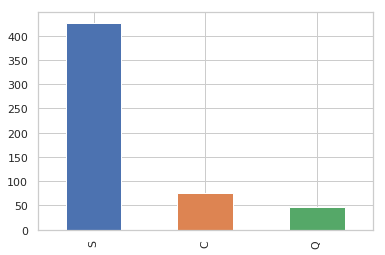

In [27]:
train[train['Survived'] == 0]['Embarked'].value_counts().plot.bar()

Looking at the data above we can say that the S Class had maximum people died and and survied Followed by C and Q

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


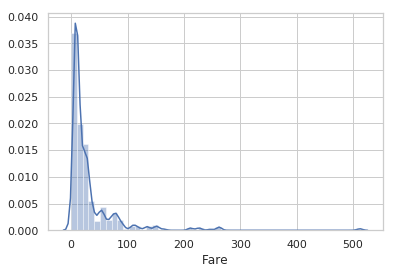

In [28]:
# Lets check the distubution of Fare
data = train['Fare']
sns.distplot(data)

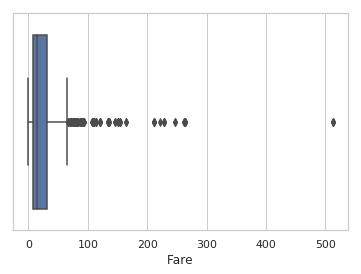

In [29]:
sns.boxplot(data)

From the above Boxplot and Distplot we can see that the Disturbation of Fare is right Skwed, and we sme outier which where are are above USD 200 to USD 500

In [30]:
check_info(train,test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
Family      891 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB
None
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Embarked    418 non-null object
Family      418 non-null int64
dtypes: flo

In [31]:
train.drop(columns=['Name'], axis=1, inplace=True)
test.drop(columns=['Name'], axis=1, inplace=True)

In [32]:
train.drop(columns=['Ticket'], axis=1, inplace=True)
test.drop(columns=['Ticket'], axis=1, inplace=True)

In [33]:
categorical_feature_mask = train.dtypes==object
categorical_cols = train.columns[categorical_feature_mask].tolist()
categorical_cols

['Sex', 'Embarked']

In [34]:
test_categorical_feature_mask = test.dtypes==object
test_categorical_cols = test.columns[test_categorical_feature_mask].tolist()
test_categorical_cols

['Sex', 'Embarked']

In [35]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [36]:
train[categorical_cols] = train[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))

In [37]:
test[categorical_cols] = test[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))

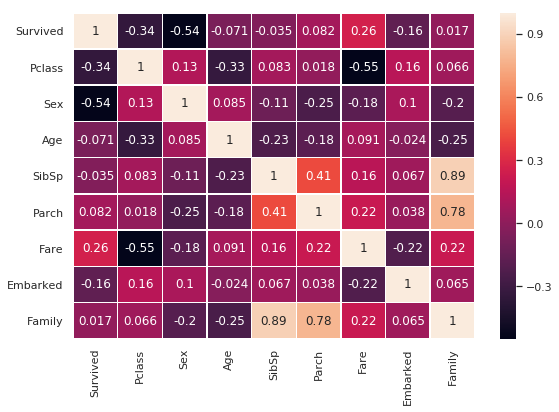

In [38]:
corr = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [39]:
# Import all libary for Sklearn Model Evalulation
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [40]:
# Let's Create our Machine Learning Model to check how it is working but before that we will create a function which will print all the ROC, AUC and Confusion Matix so we will not have to performance these step mannualy.
def run_model(model, name, Xtrain, Xtest, ytrain, ytest):
  print(name + 'Model Details')
  model.fit(Xtrain, ytrain)
  ypred = model.predict(Xtest)
  print("F1 score is: {}".format(f1_score(ytest, ypred)))
  print("AUC Score is: {}".format(roc_auc_score(ytest, ypred)))

In [41]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [42]:
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()
ada = AdaBoostClassifier()
clf = tree.DecisionTreeClassifier()
log = LogisticRegression()

In [43]:
model_list = [gbc, rfc, xgb, ada, clf]

In [44]:
model_name = ['Gradient Boosting', 'Random Forest', 'XGBoost', 'Ada Boost', 'Decision Tree']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = train.drop(columns=['Survived'], axis=1)
y = train.Survived

In [47]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [48]:
gbc.fit(Xtrain, ytrain)
gbcpred = gbc.predict(Xtest)
print("Accuracy score is: {}".format(accuracy_score(ytest, gbcpred)))
print("F1 score is: {}".format(f1_score(ytest, gbcpred)))
print("AUC Score is: {}".format(roc_auc_score(ytest, gbcpred)))

Accuracy score is: 0.8379888268156425
F1 score is: 0.7716535433070866
AUC Score is: 0.8141633728590252


In [49]:
rfc.fit(Xtrain, ytrain)
rfcpred = rfc.predict(Xtest)
print("Accuracy score is: {}".format(accuracy_score(ytest, rfcpred)))
print("F1 score is: {}".format(f1_score(ytest, rfcpred)))
print("AUC Score is: {}".format(roc_auc_score(ytest, rfcpred)))

Accuracy score is: 0.8491620111731844
F1 score is: 0.7969924812030075
AUC Score is: 0.8340579710144927


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
xgb.fit(Xtrain, ytrain)
xgbpred = xgb.predict(Xtest)
print("Accuracy score is: {}".format(accuracy_score(ytest, xgbpred)))
print("F1 score is: {}".format(f1_score(ytest, xgbpred)))
print("AUC Score is: {}".format(roc_auc_score(ytest, xgbpred)))

Accuracy score is: 0.8324022346368715
F1 score is: 0.7540983606557377
AUC Score is: 0.8015151515151515


In [51]:
ada.fit(Xtrain, ytrain)
adapred = ada.predict(Xtest)
print("Accuracy score is: {}".format(accuracy_score(ytest, adapred)))
print("F1 score is: {}".format(f1_score(ytest, adapred)))
print("AUC Score is: {}".format(roc_auc_score(ytest, adapred)))

Accuracy score is: 0.8435754189944135
F1 score is: 0.7910447761194029
AUC Score is: 0.8295125164690381


In [52]:
clf.fit(Xtrain, ytrain)
clfpred = clf.predict(Xtest)
print("Accuracy score is: {}".format(accuracy_score(ytest, clfpred)))
print("F1 score is: {}".format(f1_score(ytest, clfpred)))
print("AUC Score is: {}".format(roc_auc_score(ytest, clfpred)))

Accuracy score is: 0.7932960893854749
F1 score is: 0.7338129496402879
AUC Score is: 0.7832015810276679


In [53]:
log.fit(Xtrain, ytrain)
logpred = log.predict(Xtest)
print("Accuracy score is: {}".format(accuracy_score(ytest, logpred)))
print("F1 score is: {}".format(f1_score(ytest, logpred)))
print("AUC Score is: {}".format(roc_auc_score(ytest, logpred)))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score is: 0.8715083798882681
F1 score is: 0.8188976377952756
AUC Score is: 0.8495388669301712


In [54]:
test['Survived'] = xgb.predict(test)

In [55]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Survived
PassengerId,,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,0,0
893,3,0,47.0,1,0,7.0000,2,1,0
894,2,1,62.0,0,0,9.6875,1,0,0
895,3,1,27.0,0,0,8.6625,2,0,0
896,3,0,22.0,1,1,12.2875,2,2,0


In [56]:
test.to_csv('survived.csv')